- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.preprocessing import normalize
from memory_profiler import memory_usage

import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader


In [2]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [3]:
#Get model
model = ModelLoader()
model.set_model(BernoulliNB())

cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

#Optimization 
param = {'alpha': np.linspace(0.5, 1.5, 100),
              'binarize': np.linspace(0, 2, 40),
              'fit_prior': [True, False]}

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='homogeneity_score',n_iter=10)

#Train model with optimal params
model.set_model(BernoulliNB(**model.optimal_params))

Score accuracy group:  0.8136645962732919
Score accuracy global:  0.2519762845849802
Memory:  157.26557793674698 MB
Score accuracy group:  0.8586956521739131
Score accuracy global:  0.325098814229249
Memory:  183.80859375 MB
Score accuracy group:  0.41847826086956524
Score accuracy global:  0.3804347826086957
Memory:  190.03125 MB
Score accuracy group:  0.38405797101449274
Score accuracy global:  0.40810276679841895
Memory:  195.984375 MB
Score accuracy group:  0.4673913043478261
Score accuracy global:  0.4367588932806324
Memory:  201.93087635869566 MB
Score accuracy group:  0.41304347826086957
Score accuracy global:  0.4515810276679842
Memory:  208.0625 MB
Score accuracy group:  0.18115942028985507
Score accuracy global:  0.45948616600790515
Memory:  213.8828125 MB
Average memory usage:  192.99514079220606 MB


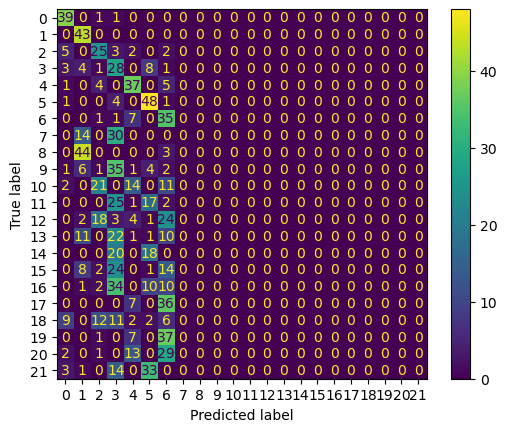

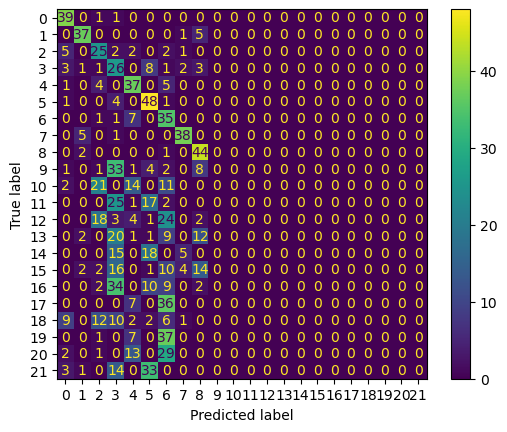

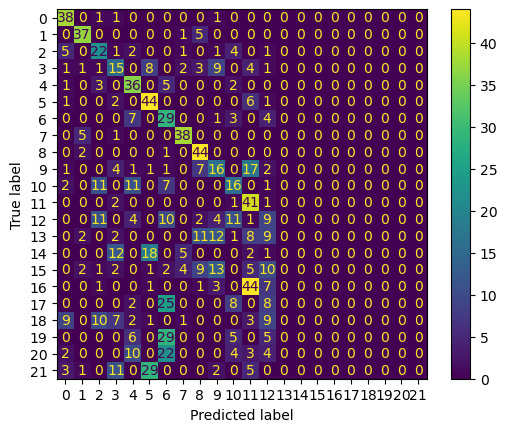

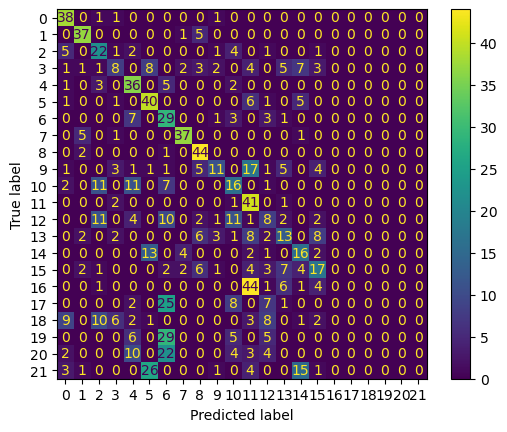

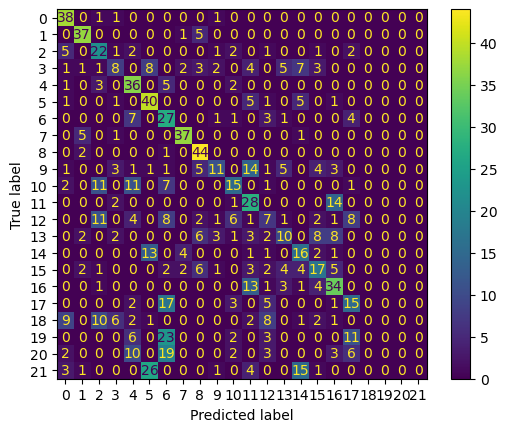

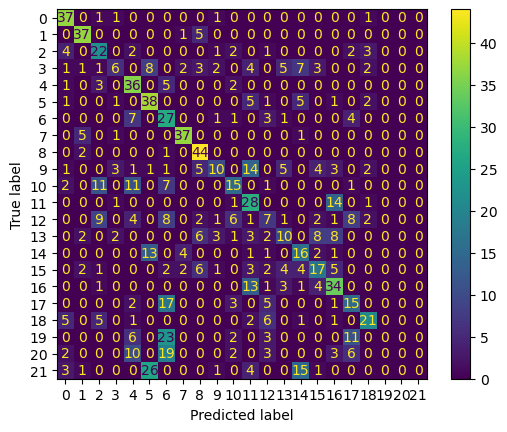

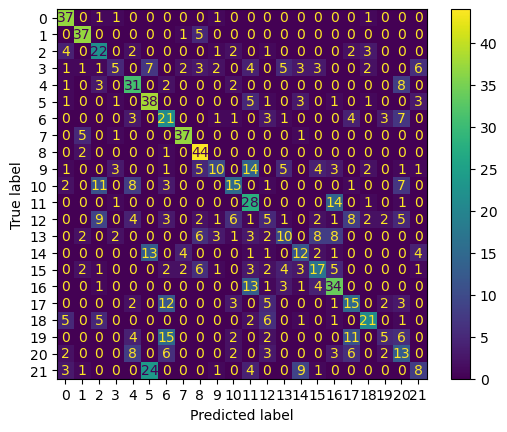

In [4]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8,9],3:[10,11,12,13],4:[14,15,16],5:[17,18],6:[19],7:[20,21,22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group)
memory_values = []

#Train model
for X_train,y_train,X_test,y_test in (zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    
    print("Score accuracy group: ",model.score(X_test,y_test))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

Score accuracy batch:  0.5296442687747036
Score accuracy global:  0.46047430830039526
Memory:  241.49609375 MB
Score accuracy batch:  0.5652173913043478
Score accuracy global:  0.45553359683794464
Memory:  230.6015625 MB
Score accuracy batch:  0.5019762845849802
Score accuracy global:  0.45849802371541504
Memory:  231.87890625 MB
Score accuracy batch:  0.4782608695652174
Score accuracy global:  0.45849802371541504
Memory:  232.796875 MB
Score accuracy batch:  0.4841897233201581
Score accuracy global:  0.45652173913043476
Memory:  233.58984375 MB
Score accuracy batch:  0.4407114624505929
Score accuracy global:  0.45652173913043476
Memory:  235.0546875 MB
Score accuracy batch:  0.44664031620553357
Score accuracy global:  0.45652173913043476
Memory:  236.3046875 MB
Score accuracy batch:  0.38735177865612647
Score accuracy global:  0.45849802371541504
Memory:  237.30078125 MB
Score accuracy batch:  0.383399209486166
Score accuracy global:  0.4575098814229249
Memory:  238.90625 MB
Score acc

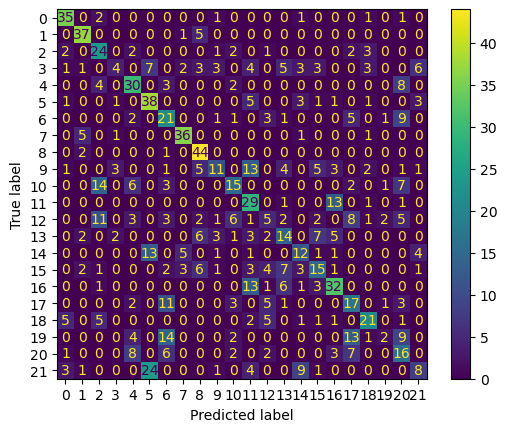

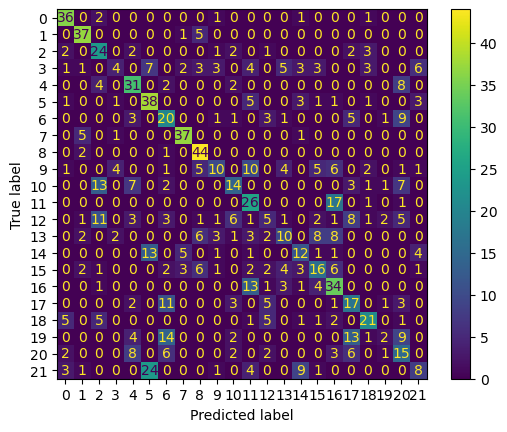

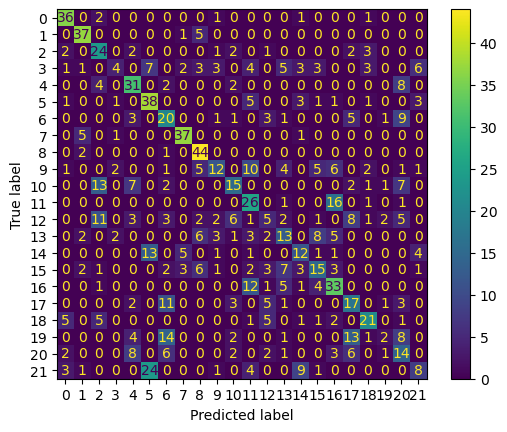

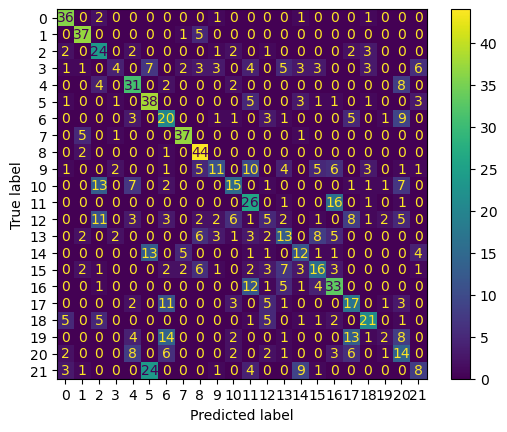

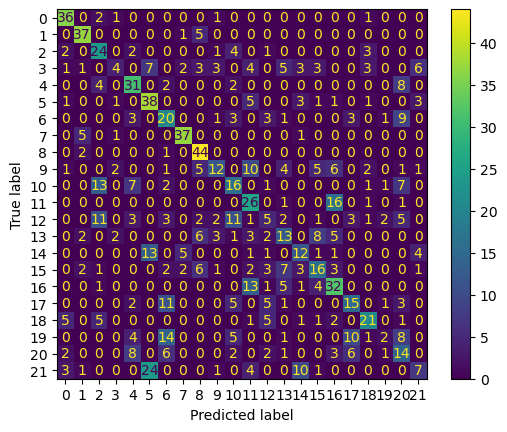

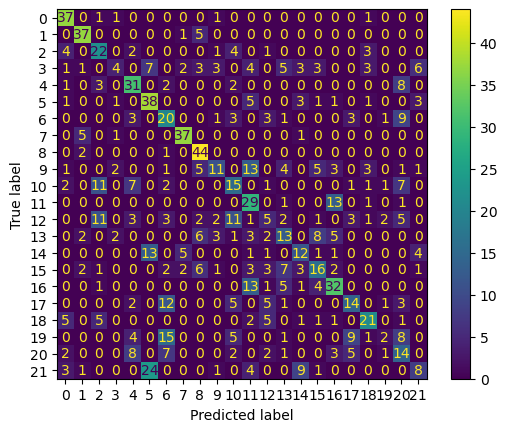

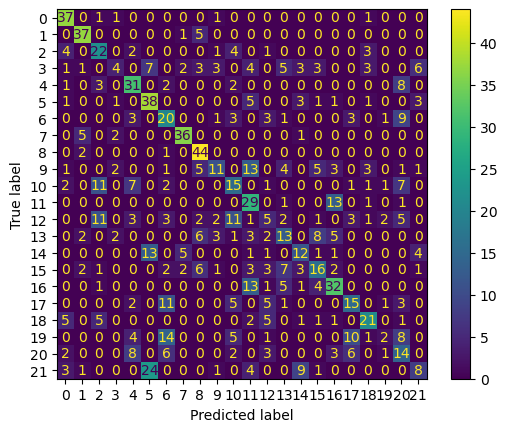

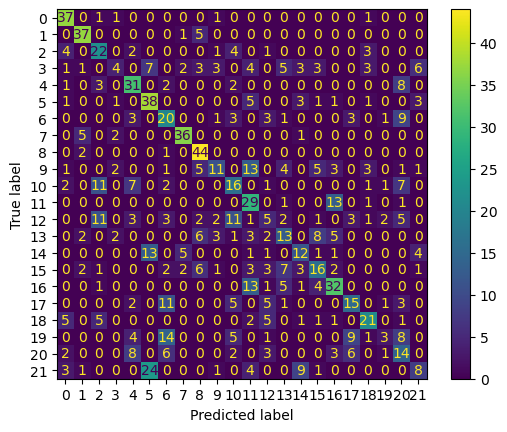

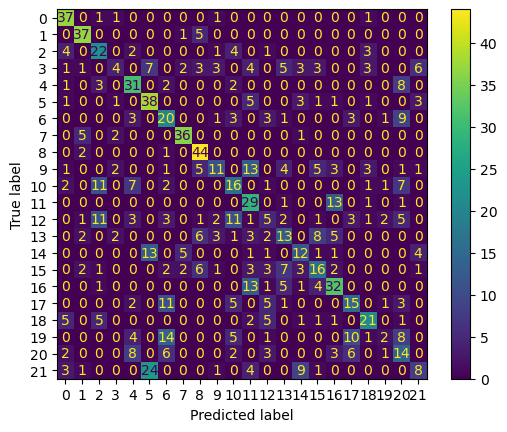

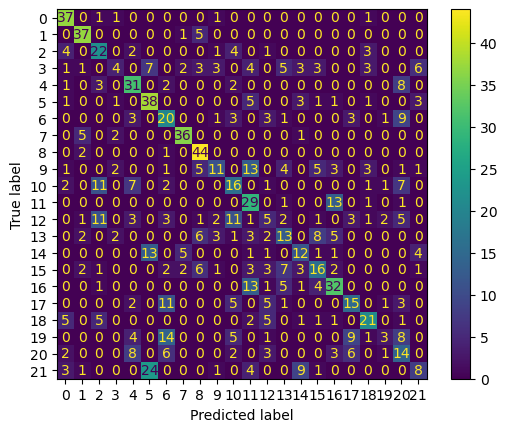

In [5]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print("Score accuracy batch: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")